In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons, make_circles, make_classification, make_gaussian_quantiles, make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, class_likelihood_ratios, classification_report

In [6]:
def generate_mixed_dataset(n_samples, n_features, n_categorical, n_ordinal, n_integer, 
                           n_classes, class_balance=None, noise=0.0, 
                           dataset_type='linear', random_state=42):

    np.random.seed(random_state)

    if dataset_type == 'linear':
        X, y = make_classification(n_samples=n_samples, n_features=n_features, 
                                  n_informative=n_features, n_redundant=0, 
                                  n_classes=n_classes, weights=class_balance, 
                                  flip_y=noise, random_state=random_state)
    elif dataset_type == 'moons':
        X, y = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
        if n_features > 2:
            extra_features = np.random.rand(n_samples, n_features - 2) * 100
            X = np.hstack([X, extra_features])
    elif dataset_type == 'circles':
        X, y = make_circles(n_samples=n_samples, noise=noise, random_state=random_state)
        if n_features > 2:
            extra_features = np.random.rand(n_samples, n_features - 2) * 100
            X = np.hstack([X, extra_features])
    elif dataset_type == 'blobs':
        X, y = make_blobs(n_samples=n_samples, centers=n_classes, cluster_std=noise*10, 
                          random_state=random_state)
        if n_features > 2:
            extra_features = np.random.rand(n_samples, n_features - 2) * 100
            X = np.hstack([X, extra_features])
    else:
        raise ValueError("Tipo de dataset não suportado. Use 'linear', 'moons', 'circles' ou 'blobs'.")

    categorical_data = np.random.choice(['A', 'B', 'C', 'D', 'E'], size=(n_samples, n_categorical))

    ordinal_data = np.random.randint(1, 6, size=(n_samples, n_ordinal))  

    integer_data = np.random.randint(0, 100, size=(n_samples, n_integer)) 

    data = np.hstack([X, categorical_data, ordinal_data, integer_data])

    columns = [f'Continuous_{i+1}' for i in range(n_features)] + \
              [f'Categorical_{i+1}' for i in range(n_categorical)] + \
              [f'Ordinal_{i+1}' for i in range(n_ordinal)] + \
              [f'Integer_{i+1}' for i in range(n_integer)]
    df = pd.DataFrame(data, columns=columns)

    df['Target'] = y

    for col in df.columns:
        if col.startswith('Continuous'):
            df[col] = df[col].astype(float)
        elif col.startswith('Ordinal') or col.startswith('Integer'):
            df[col] = df[col].astype(int)

    return df

In [7]:
def plot_decision_boundary(model, X, y, title):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")
    plt.title(title)

In [8]:
# Gerar o dataset

X, y = make_classification(
    n_samples=70,  # Small sample size
    n_features=2,  # Low dimensionality (increased to 3 to accommodate redundancy)
    n_informative=1,
    n_redundant=1,  # Introduce multicollinearity
    n_clusters_per_class=1,
    weights=[0.95, 0.05],  # Imbalanced classes
    class_sep=0.0000001,  # Non-linear boundaries (decreased to make it harder for Logistic Regression)
    random_state=42
)

dataset_qda = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir o dataset em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Treinar e avaliar Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_lda, y_train)
y_pred = logreg.predict(X_test_lda)
accuracy_logreg = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy_logreg}')

# Avaliar LDA diretamente
accuracy_lda = accuracy_score(y_test, lda.predict(X_test))
print(f'Accuracy of LDA: {accuracy_lda}')

Accuracy of Logistic Regression: 0.9523809523809523
Accuracy of LDA: 0.9523809523809523


   Feature_1  Feature_2  Feature_3  Class
0   0.658686  -0.381674  -0.006661      0
1  -0.508323  -1.257614  -0.030070      0
2   0.128734  -0.833219  -0.018511      0
3   0.198409  -0.880295  -0.019368      0
4   1.337569   0.166446   0.007832      0


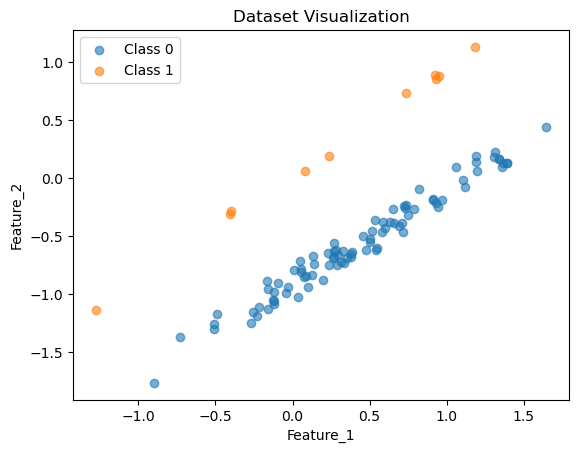

Accuracy of Logistic Regression: 1.0
Accuracy of LDA: 1.0


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create a dataset with Gaussian distribution, small sample size, low dimensionality, non-linear boundaries, multicollinearity, and imbalanced classes
X, y = make_classification(
    n_samples=100,  # Small sample size
    n_features=3,  # Low dimensionality (increased to 3 to accommodate redundancy)
    n_informative=2,
    n_redundant=1,  # Introduce multicollinearity
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # Imbalanced classes
    class_sep=0.5,  # Non-linear boundaries
    random_state=42
)

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3'])
df['Class'] = y

# Display the first few rows of the dataset
print(df.head())

# Plot the dataset to visualize non-linear boundaries and imbalanced classes
plt.scatter(df[df['Class'] == 0]['Feature_1'], df[df['Class'] == 0]['Feature_2'], label='Class 0', alpha=0.6)
plt.scatter(df[df['Class'] == 1]['Feature_1'], df[df['Class'] == 1]['Feature_2'], label='Class 1', alpha=0.6)
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.title('Dataset Visualization')
plt.show()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Treinar e avaliar Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_lda, y_train)
y_pred = logreg.predict(X_test_lda)
accuracy_logreg = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy_logreg}')

# Avaliar LDA diretamente
accuracy_lda = accuracy_score(y_test, lda.predict(X_test))
print(f'Accuracy of LDA: {accuracy_lda}')

# Logistic Regression

Logistic Regression Accuracy: 0.83
LDA Accuracy: 0.72


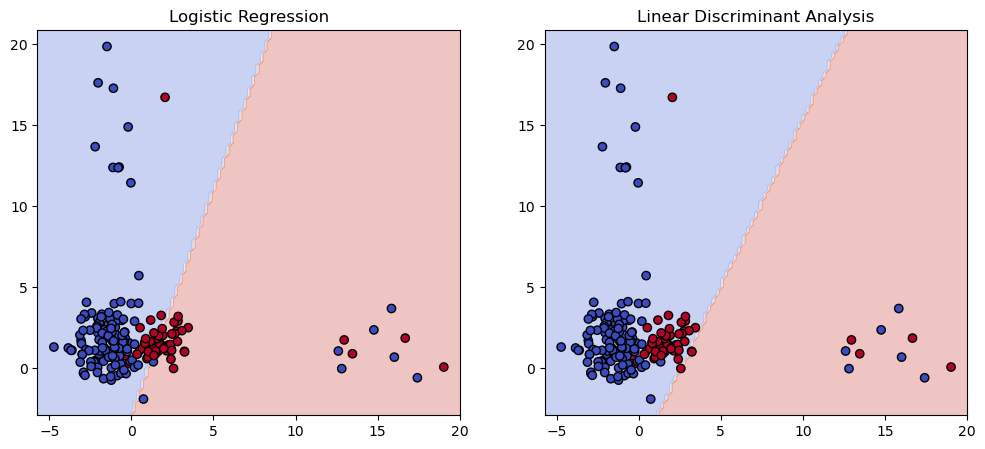

In [10]:
X, y = make_classification(n_samples=200, 
                           n_features=2, 
                           n_classes=2,  
                           n_informative=2, 
                           n_redundant=0,  
                           n_clusters_per_class=1,
                           random_state=42,
                           class_sep=1.5,
                           weights=[0.7, 0.3]) 

dataset_lr = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
dataset_lr.columns = ["Feature 1", "Feature 2", "Class"]

np.random.seed(52)
outlier_indices = np.random.choice(dataset_lr.index, size=10, replace=False)
dataset_lr.loc[outlier_indices, "Feature 1"] = np.random.uniform(low=10, high=20, size=10)


np.random.seed(42)
outlier_indices = np.random.choice(dataset_lr.index, size=10, replace=False)
dataset_lr.loc[outlier_indices, "Feature 2"] = np.random.uniform(low=10, high=20, size=10)


X = dataset_lr.iloc[:, :-1].values
y = dataset_lr.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
log_reg = LogisticRegression(solver="lbfgs")
lda = LinearDiscriminantAnalysis()

log_reg.fit(X_train, y_train)
lda.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_lda = lda.predict(X_test)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lda = accuracy_score(y_test, y_pred_lda)

print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"LDA Accuracy: {acc_lda:.2f}")


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_decision_boundary(log_reg, X, y, "Logistic Regression")

plt.subplot(1,2,2)
plot_decision_boundary(lda, X, y, "Linear Discriminant Analysis")

plt.show()


Logistic Regression Accuracy: 0.86
LDA Accuracy: 0.88


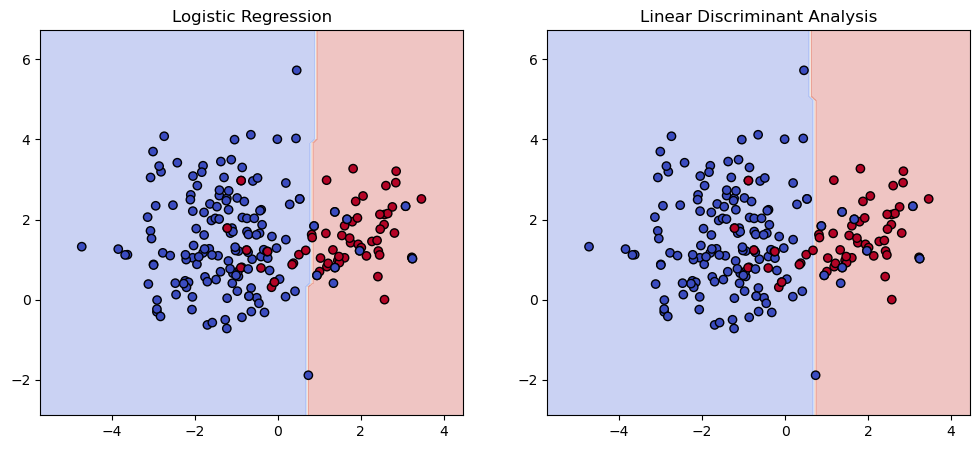

In [11]:

X, y = make_classification(n_samples=200, 
                           n_features=2, 
                           n_classes=2,  
                           n_informative=2, 
                           n_redundant=0,  
                           n_clusters_per_class=1,
                           random_state=42,
                           class_sep=1.5,
                           weights=[0.7, 0.3]) 

dataset = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
dataset.columns = ["Feature 1", "Feature 2", "Class"]


outliers = dataset[dataset["Class"] == 0].sample(5, random_state=42)
outliers["Class"] = 1

outliers2 = dataset[dataset["Class"] == 1].sample(10, random_state=32)
outliers2["Class"] = 0

dataset = pd.concat([dataset, outliers2, outliers], ignore_index=True)


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
log_reg = LogisticRegression(solver="lbfgs")
lda = LinearDiscriminantAnalysis()

log_reg.fit(X_train, y_train)
lda.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_lda = lda.predict(X_test)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lda = accuracy_score(y_test, y_pred_lda)

print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"LDA Accuracy: {acc_lda:.2f}")


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_decision_boundary(log_reg, X, y, "Logistic Regression")

plt.subplot(1,2,2)
plot_decision_boundary(lda, X, y, "Linear Discriminant Analysis")

plt.show()


# LDA

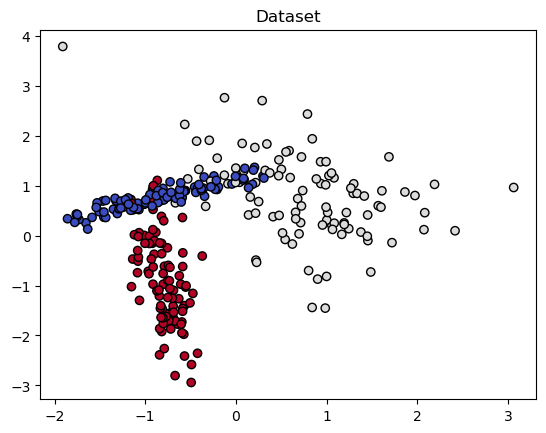

LDA Accuracy: 
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        27
           1       0.87      0.87      0.87        38
           2       1.00      0.72      0.84        25

    accuracy                           0.81        90
   macro avg       0.84      0.80      0.81        90
weighted avg       0.84      0.81      0.82        90

QDA Accuracy: 
              precision    recall  f1-score   support

           0       0.76      0.93      0.83        27
           1       0.94      0.89      0.92        38
           2       1.00      0.84      0.91        25

    accuracy                           0.89        90
   macro avg       0.90      0.89      0.89        90
weighted avg       0.90      0.89      0.89        90



In [12]:
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_classes=3,
                           n_redundant=0, n_clusters_per_class=1, class_sep=0.8, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot Data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Dataset")
plt.show()

# Train LDA and QDA
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

lda.fit(X_train, y_train)
qda.fit(X_train, y_train)

# Predictions
y_pred_lda = lda.predict(X_test)
y_pred_qda = qda.predict(X_test)

# Accuracy Scores
acc_lda = classification_report(y_test, y_pred_lda)
acc_qda = classification_report(y_test, y_pred_qda)

print(f"LDA Accuracy: \n{acc_lda}")
print(f"QDA Accuracy: \n{acc_qda}")


# Plot the decision boundary



# QDA

## Adquate Dataset

QDA Accuracy: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        31

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



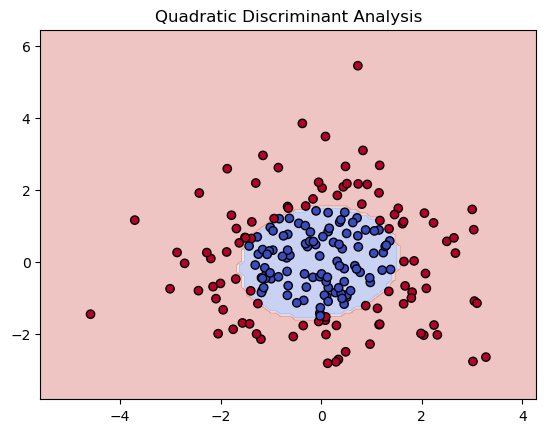

In [13]:
# Generate dataset using make_gaussian_quantiles because this allows for a non-linear seperate classes
X, y = make_gaussian_quantiles(mean=(0, 0), cov=2.0, n_samples=200, n_classes=2, random_state=42)

dataset_qda = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

acc_qda = classification_report(y_test, y_pred)

print(f"QDA Accuracy: \n{acc_qda}")


plot_decision_boundary(qda, X, y, "Quadratic Discriminant Analysis")
plt.show()



# Comparison of the three datasets and methods

## First dataset

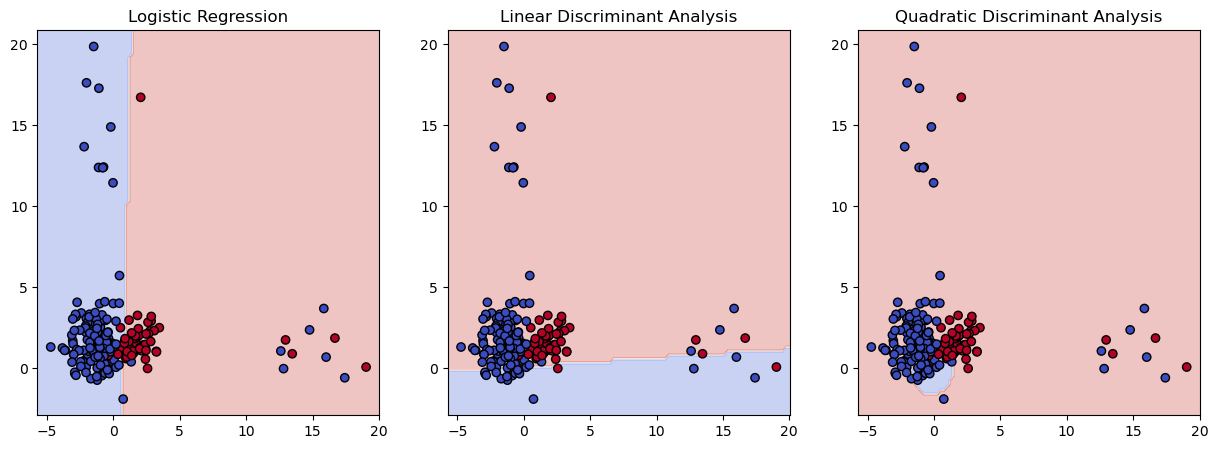

In [65]:
X, y = dataset_lr.iloc[:, :-1].values, dataset_lr.iloc[:, -1].values

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_decision_boundary(log_reg, X, y, "Logistic Regression")

plt.subplot(1,3,2)
plot_decision_boundary(lda, X, y, "Linear Discriminant Analysis")

plt.subplot(1,3,3)
plot_decision_boundary(qda, X, y, "Quadratic Discriminant Analysis")

plt.show()

# Second Dataset

Accuracy of LDA: 0.9444444444444444
Accuracy of Logistic Regression: 0.9222222222222223


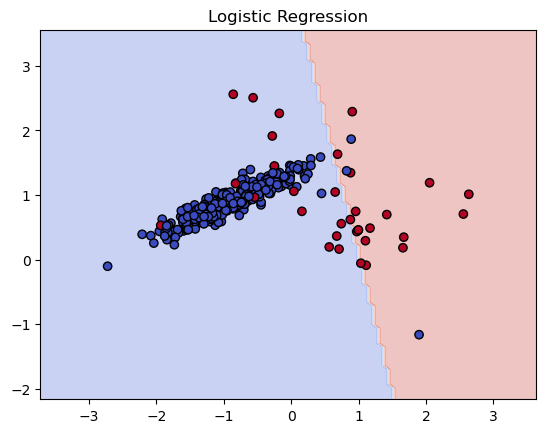

In [87]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Criar um dataset sintético com mais ruído
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42, class_sep=0.9, flip_y=0.1, weights=[0.9, 0.1])

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA: {accuracy_lda}')

# Treinar e avaliar Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy_logreg}')



plot_decision_boundary(logreg, X, y, "Logistic Regression")
plt.show()

## Third Dataset

ValueError: X has 2 features, but LinearDiscriminantAnalysis is expecting 20 features as input.

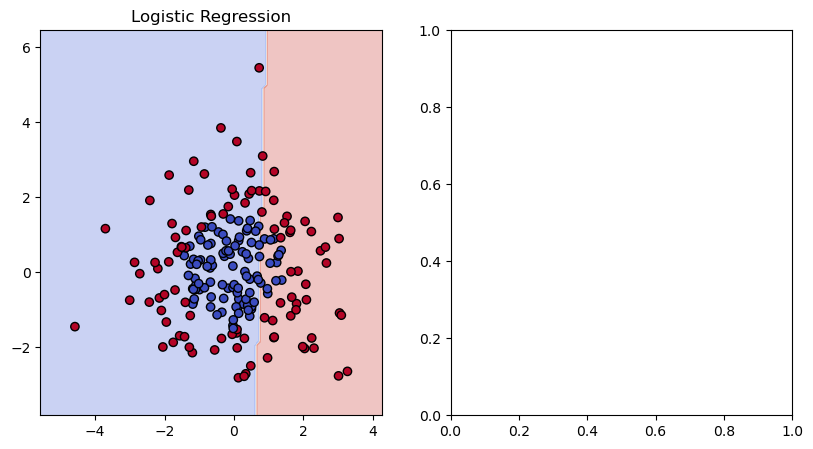

In [16]:
X, y = dataset_qda.iloc[:, :-1].values, dataset_qda.iloc[:, -1].values

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_decision_boundary(log_reg, X, y, "Logistic Regression")

plt.subplot(1,3,2)
plot_decision_boundary(lda, X, y, "Linear Discriminant Analysis")

plt.subplot(1,3,3)
plot_decision_boundary(qda, X, y, "Quadratic Discriminant Analysis")

plt.show()